# Coleta de dados de sites na Web - Web Scraping

Neste repositório, irei compartilhar códigos referentes a Web Scraping, que tem como objetivo a extração de dados de páginas Web.

**O que será usado?**

Será utilizada uma das bibliotecas mais usadas para web-scraping. Existem diversas possibilidades para esse tipo de programação, podendo automatizar diversas tarefas em uma empresa.

**Quais tipos de problemas que vamos resolver?**

R - Mineração que permite a extração de dados de sites 2 páginas web para construir um dataset acessível com as principais informações dos Fundos Imobiliários. Além disso, identificar os possíveis casos de dados ausentes (missing).

# Configurando o ambiente

Aqui temos todas as bibliotecas que utilizaremos neste notebook.

In [1]:
# importar todos os dataset

import time
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from datetime import datetime

# Carregando os dados

Pegaremos os dados diretamente do repositório no github assim eles podem ser atualizados e, com isso estaremos preparados para identificar novas análises os dados.

In [2]:
# Conexão a página web

url = 'https://www.fundsexplorer.com.br/ranking'
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
table = soup.find(name='table')
df = pd.read_html(str(table), encoding = 'utf-8', decimal = ',', thousands = '.')[0]


In [3]:
display(df)

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,10",72770.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.678.487,99","R$ 6,98",0.30,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",440410.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 431.325.803,06","R$ 10,67",1.38,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,08",1670.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.305.951,24","R$ 13,89",0.44,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 891,00",140.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",0.40,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 8,51",9490.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -9.870.075,03","R$ -13,01",-0.65,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,RBLG11,Logística,"R$ 86,90",170.0,"R$ 0,80","0,92%","2,76%","5,46%","10,06%","0,92%",...,"R$ 66.897.594,99","R$ 104,50",0.83,"0,77%","1,72%","2,50%","3,30%","0,00%",NaN,1
278,QAGR11,Outros,"R$ 46,72",142500.0,"R$ 0,40","0,86%","2,51%","4,83%","9,36%","0,84%",...,"R$ 300.831.716,41","R$ 59,69",0.78,"0,65%","-0,03%","0,62%","1,87%",NaN,NaN,12
279,CRFF11,Títulos e Val. Mob.,"R$ 65,82",2120.0,"R$ 0,63","0,96%","2,73%","5,00%","8,61%","0,91%",...,"R$ 59.827.386,69","R$ 86,70",0.76,"0,68%","-0,61%","0,06%","4,39%",NaN,NaN,0
280,CXRI11,Híbrido,"R$ 63,28",91390.0,"R$ 0,64","1,01%","2,70%","5,01%","8,95%","0,90%",...,"R$ 132.926.744,20","R$ 84,36",0.75,"0,65%","-1,18%","-0,53%","2,62%",NaN,NaN,0


# Análise Exploratória dos Dados

Queremos ver como está a estatística básicas dos dados.

In [4]:
df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    object 
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    object 
 5   DividendYield            276 non-null    object 
 6   DY (3M)Acumulado         276 non-null    object 
 7   DY (6M)Acumulado         276 non-null    object 
 8   DY (12M)Acumulado        276 non-null    object 
 9   DY (3M)Média             276 non-null    object 
 10  DY (6M)Média             276 non-null    object 
 11  DY (12M)Média            276 non-null    object 
 12  DY Ano                   263 non-null    object 
 13  Variação Preço           276 non-null    object 
 14  Rentab.Período           2

In [6]:
# Quantidade de valores vazios

df.isna().sum()

Códigodo fundo               0
Setor                        4
Preço Atual                  8
Liquidez Diária              8
Dividendo                    0
DividendYield                6
DY (3M)Acumulado             6
DY (6M)Acumulado             6
DY (12M)Acumulado            6
DY (3M)Média                 6
DY (6M)Média                 6
DY (12M)Média                6
DY Ano                      19
Variação Preço               6
Rentab.Período               6
Rentab.Acumulada             6
PatrimônioLíq.               0
VPA                          0
P/VPA                        8
DYPatrimonial               38
VariaçãoPatrimonial         38
Rentab. Patr.no Período     38
Rentab. Patr.Acumulada      38
VacânciaFísica             159
VacânciaFinanceira         252
QuantidadeAtivos             0
dtype: int64

# Processo de tratamento dos dados

No processo de ETL os dados são transformados e ajustados conforme a necessidade, dessa forma, esses dados podem ser atribuídas diferentes regras que vão ajudar a melhorar a sua qualidade.

In [7]:

float_coluna = list(df.iloc[:,3:-1])
df[float_coluna].columns

# Substituir valores vazios por zero
df[float_coluna] = df[float_coluna].fillna(value=0)

print(float_coluna)

['Liquidez Diária', 'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado', 'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média', 'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial', 'VariaçãoPatrimonial', 'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira']


In [8]:
df[float_coluna] = df[float_coluna]\
    .applymap(lambda x: str(x) \
        .replace('R$', '') \
        .replace('.', '') \
        .replace('%', '') \
        .replace(',', '.')
    )

df[float_coluna] = df[float_coluna].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    object 
 3   Liquidez Diária          282 non-null    float64
 4   Dividendo                282 non-null    float64
 5   DividendYield            282 non-null    float64
 6   DY (3M)Acumulado         282 non-null    float64
 7   DY (6M)Acumulado         282 non-null    float64
 8   DY (12M)Acumulado        282 non-null    float64
 9   DY (3M)Média             282 non-null    float64
 10  DY (6M)Média             282 non-null    float64
 11  DY (12M)Média            282 non-null    float64
 12  DY Ano                   282 non-null    float64
 13  Variação Preço           282 non-null    float64
 14  Rentab.Período           2

In [9]:

df['P/VPA'] = df['P/VPA'] / 100

df.head(2)

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,10",727700.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.567849e+07,6.98,0.03,0.0,0.0,0.0,0.0,56.0,0.0,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",4404100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.313258e+08,10.67,1.38,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
df.isna().sum()

Códigodo fundo             0
Setor                      4
Preço Atual                8
Liquidez Diária            0
Dividendo                  0
DividendYield              0
DY (3M)Acumulado           0
DY (6M)Acumulado           0
DY (12M)Acumulado          0
DY (3M)Média               0
DY (6M)Média               0
DY (12M)Média              0
DY Ano                     0
Variação Preço             0
Rentab.Período             0
Rentab.Acumulada           0
PatrimônioLíq.             0
VPA                        0
P/VPA                      0
DYPatrimonial              0
VariaçãoPatrimonial        0
Rentab. Patr.no Período    0
Rentab. Patr.Acumulada     0
VacânciaFísica             0
VacânciaFinanceira         0
QuantidadeAtivos           0
dtype: int64

<AxesSubplot:>

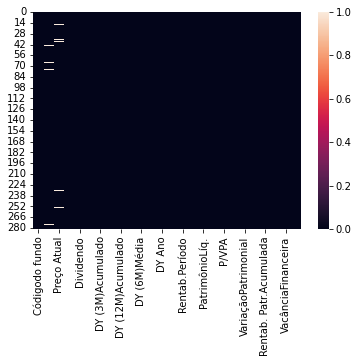

In [11]:
#Checando existência de colunas com dados NA

sns.heatmap(df.isna())

# Tratamento dos dados da coluna Setor

In [12]:
df[df['Setor'].isna()]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
43,BIME11,NaN,"R$ 9,43",1851900.0,0.15,1.54,4.29,7.54,0.0,1.43,...,5.531339e+07,9.46,0.10,1.59,-0.49,1.09,4.17,0.0,0.0,0
65,GTLG11,NaN,"R$ 99,95",300.0,0.70,0.70,2.10,4.21,0.0,0.70,...,6.756637e+08,94.20,1.06,0.74,-1.52,-0.79,-0.28,0.0,0.0,0
74,ERPA11,NaN,"R$ 126,50",100.0,0.28,0.22,0.00,0.00,0.0,0.00,...,5.780617e+07,115.40,0.11,0.20,0.24,0.43,0.43,0.0,0.0,0
275,CXCI11,NaN,"R$ 77,00",98300.0,0.80,1.04,0.00,0.00,0.0,0.00,...,2.009911e+08,97.68,0.79,0.72,-0.07,0.65,0.96,0.0,0.0,0


In [13]:
Setor_NaN = df['Códigodo fundo'][df['Setor'].isna()].values
print(Setor_NaN)

['BIME11' 'GTLG11' 'ERPA11' 'CXCI11']


In [14]:
def pegar_setor(codigo):

    response = requests.get(f'https://statusinvest.com.br/fundos-imobiliarios/{codigo}/')
    soup = BeautifulSoup(response.text, 'html.parser')
    infos = soup.find_all('div', {'class' : 'top-info-1'})
    for elemento in infos:
        lista_de_valores = elemento.find_all('strong', {'class' : 'value'})
        if len(lista_de_valores) > 5:
            sector = lista_de_valores[5]
            return sector.text
        

In [15]:
lista_setor = list(map(lambda x: [x, pegar_setor(x)], Setor_NaN))
print(lista_setor)

[['BIME11', 'Híbrido'], ['GTLG11', 'Logística'], ['ERPA11', 'Lajes Corporativas'], ['CXCI11', 'Títulos e Valores Mobiliários']]


In [16]:
for setor in lista_setor:
    df.loc[df['Códigodo fundo'] == setor[0], 'Setor'] = setor[1]

In [17]:
df[df['Setor'].isna()]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos


# Tratamento dos dados da coluna Preço Atual

In [18]:
df[df['Preço Atual'].isna()]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
16,HGRS11,Residencial,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,1.067687e+08,89.39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0
36,VJFD11,Híbrido,NaN,0.0,0.86,0.0,0.0,0.0,0.0,0.0,...,6.466092e+08,132.61,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0
38,YUFI11B,Residencial,NaN,0.0,0.60,0.0,0.0,0.0,0.0,0.0,...,4.110636e+07,104.03,0.0,0.58,-0.28,0.29,2.72,0.0,0.0,0
162,SPVJ11,Outros,NaN,0.0,0.69,0.0,0.0,0.0,0.0,0.0,...,6.790620e+08,107.58,0.0,0.61,-0.03,0.58,3.05,0.0,0.0,0
184,NVIF11B,Outros,NaN,0.0,0.44,0.0,0.0,0.0,0.0,0.0,...,8.594018e+07,254.71,0.0,0.17,0.44,0.61,0.42,0.0,0.0,0
193,BBIM11,Títulos e Val. Mob.,NaN,0.0,0.09,0.0,0.0,0.0,0.0,0.0,...,5.070660e+07,48.99,0.0,0.51,1.15,1.66,6.09,0.0,0.0,0
231,BTSG11,Híbrido,NaN,0.0,0.78,0.0,0.0,0.0,0.0,0.0,...,1.032627e+08,133.24,0.0,0.59,0.00,0.59,2.98,0.0,0.0,0
253,STRX11,Híbrido,NaN,0.0,0.76,0.0,0.0,0.0,0.0,0.0,...,2.269723e+08,140.67,0.0,0.52,0.04,0.56,2.46,0.0,0.0,0


In [19]:
Setor_NaN_Preco_Atual = df['Códigodo fundo'][df['Preço Atual'].isna()].values
print(Setor_NaN_Preco_Atual)

['HGRS11' 'VJFD11' 'YUFI11B' 'SPVJ11' 'NVIF11B' 'BBIM11' 'BTSG11' 'STRX11']


In [20]:
def pegar_preco_atual(codigo_2):

    response = requests.get(f'https://statusinvest.com.br/fundos-imobiliarios/{codigo_2}/')
    soup = BeautifulSoup(response.text, 'html.parser')
    infos = soup.find_all('div', {'class' : 'top-info'})
    for elemento in infos:
        lista_de_valores = elemento.find_all('strong', {'class' : 'value'})
        if len(lista_de_valores) > 0:
            preco = lista_de_valores[0]
            return preco.text


In [21]:
lista_preco_atual = list(map(lambda x: [x, pegar_preco_atual(x)], Setor_NaN_Preco_Atual))
print(lista_preco_atual)

[['HGRS11', '0,00'], ['VJFD11', '0,00'], ['YUFI11B', None], ['SPVJ11', '0,00'], ['NVIF11B', '227,50'], ['BBIM11', '0,00'], ['BTSG11', '0,00'], ['STRX11', '8,52']]


In [22]:
for precos in lista_preco_atual:
    df.loc[df['Códigodo fundo'] == precos[0], 'Preço Atual'] = precos[1]

In [23]:
df[df['Preço Atual'].isna()]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
38,YUFI11B,Residencial,None,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,41106356.8,104.03,0.0,0.58,-0.28,0.29,2.72,0.0,0.0,0


In [24]:

# Substituir valores vazios por zero
# df[float_coluna] = df[float_coluna].fillna(value=0)

# print(float_coluna)

In [25]:
df.isna().sum()

Códigodo fundo             0
Setor                      0
Preço Atual                1
Liquidez Diária            0
Dividendo                  0
DividendYield              0
DY (3M)Acumulado           0
DY (6M)Acumulado           0
DY (12M)Acumulado          0
DY (3M)Média               0
DY (6M)Média               0
DY (12M)Média              0
DY Ano                     0
Variação Preço             0
Rentab.Período             0
Rentab.Acumulada           0
PatrimônioLíq.             0
VPA                        0
P/VPA                      0
DYPatrimonial              0
VariaçãoPatrimonial        0
Rentab. Patr.no Período    0
Rentab. Patr.Acumulada     0
VacânciaFísica             0
VacânciaFinanceira         0
QuantidadeAtivos           0
dtype: int64

In [26]:
# ajuste do tipo de coluna

df[['Códigodo fundo', 'Setor']] = df[['Códigodo fundo', 'Setor']].astype('category') 

In [27]:
display(df)

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,10",727700.0,0.00,0.00,0.00,0.00,0.00,0.00,...,6.567849e+07,6.98,0.03,0.00,0.00,0.00,0.00,56.00,0.0,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",4404100.0,0.00,0.00,0.00,0.00,0.00,0.00,...,4.313258e+08,10.67,1.38,0.00,0.00,0.00,0.00,0.00,0.0,0
2,XTED11,Lajes Corporativas,"R$ 6,08",16700.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2.730595e+07,13.89,0.44,0.00,0.00,0.00,0.00,0.00,100.0,1
3,ALMI11,Lajes Corporativas,"R$ 891,00",1400.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2.496330e+08,2245.37,0.04,0.00,0.00,0.00,0.00,64.05,0.0,1
4,PABY11,Híbrido,"R$ 8,51",94900.0,0.00,0.00,0.00,0.00,0.00,0.00,...,-9.870075e+06,-13.01,-0.65,0.00,0.00,0.00,0.00,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,RBLG11,Logística,"R$ 86,90",1700.0,0.80,0.92,2.76,5.46,10.06,0.92,...,6.689759e+07,104.50,0.83,0.77,1.72,2.50,3.30,0.00,0.0,1
278,QAGR11,Outros,"R$ 46,72",1425000.0,0.40,0.86,2.51,4.83,9.36,0.84,...,3.008317e+08,59.69,0.78,0.65,-0.03,0.62,1.87,0.00,0.0,12
279,CRFF11,Títulos e Val. Mob.,"R$ 65,82",21200.0,0.63,0.96,2.73,5.00,8.61,0.91,...,5.982739e+07,86.70,0.76,0.68,-0.61,0.06,4.39,0.00,0.0,0
280,CXRI11,Híbrido,"R$ 63,28",913900.0,0.64,1.01,2.70,5.01,8.95,0.90,...,1.329267e+08,84.36,0.75,0.65,-1.18,-0.53,2.62,0.00,0.0,0
